In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [50]:
df = pd.read_csv("Data4.csv")
# df

In [51]:
df = df.drop('Sl.', axis = 1)

In [52]:
df.insert(0, "x0", 1)
d=4

In [53]:
accu_vector = np.array(([0.],)*d)
accu_matrix = accu_vector * accu_vector.T
accu_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [54]:
def Xi_Xi_T(df):
    Xi_XiT_vect =  accu_matrix
    for i in range(len(df)):
        Xi_XiT_vect += (np.array((df.iloc[i][:d],)).T) @ (np.array((df.iloc[i][:d],)))
    return Xi_XiT_vect    
   
Xi_XiT_vector = Xi_Xi_T(df)

inverse = np.linalg.inv(Xi_XiT_vector)
inverse.shape 

(4, 4)

In [55]:
def XiYi(df):
    l = accu_vector
    
    for i in range(len(df)):
        l += (np.array((df.iloc[i][:d],)).T) @ (np.array((df.iloc[i][d:],)).T)
    return l    
xiyi_vector = XiYi(df)        

In [56]:
w = np.matmul(inverse, xiyi_vector)
w

array([[13.23947782],
       [ 6.13243763],
       [ 2.39226554],
       [ 7.74681038]])

In [57]:
def predict(vector):
    global w
    
    return w.T @ vector

def prediction_values(df):
    lst = []
    
    for i in range(len(df)):
        k = predict(df.iloc[i][:d])
        lst.append(k[0])
    return lst

prediction_val = prediction_values(df)
df["predicted_values"] = prediction_val

In [58]:
RSS = np.sum((df['y'] - df['predicted_values'])**2)
TSS = np.sum((np.mean(df['y']) - df['y'])**2)
R2 = 1 - (RSS/TSS)
R2

0.9841749058943147

In [59]:
MSE = np.mean((df['y'] - df['predicted_values'])**2)
RMSE = np.sqrt(np.mean((df['y'] - df['predicted_values'])**2))
MAE = np.mean(abs(df['y'] - df['predicted_values']))
print("Mean Square Error: ", MSE)
print("Root Mean Square Error: ", RMSE)
print("Mean Absolute Error: ", MAE)
print("R square val: ",R2)

Mean Square Error:  34.620480829243554
Root Mean Square Error:  5.883917133104744
Mean Absolute Error:  5.155505630377769
R square val:  0.9841749058943147


Text(0.5, 1.0, 'Linear Regression Dataset 4')

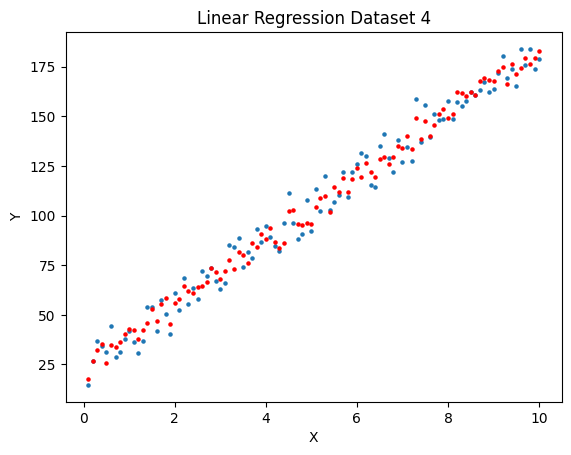

In [60]:
x = list(df["x1"])
y = list(df["y"])
y1 = list(df["predicted_values"])


plt.scatter(x, y,s=5)
plt.scatter(x, y1, color='red',s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Dataset 4")

Text(0.5, 1.0, 'Linear Regression Dataset 4')

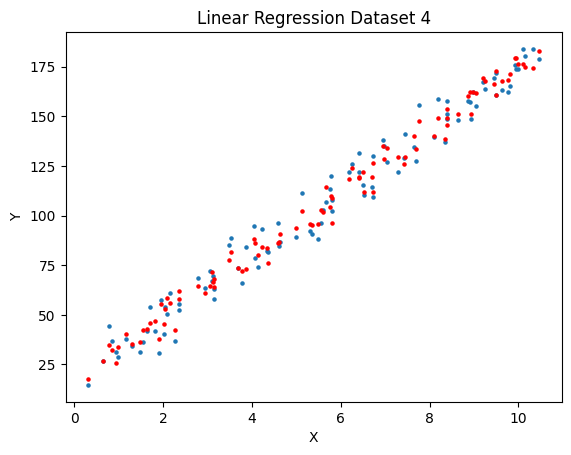

In [61]:
x = list(df["x2"])
y = list(df["y"])
y1 = list(df["predicted_values"])


plt.scatter(x, y,s=5)
plt.scatter(x, y1, color='red',s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Dataset 4")

Text(0.5, 1.0, 'Linear Regression Dataset 4')

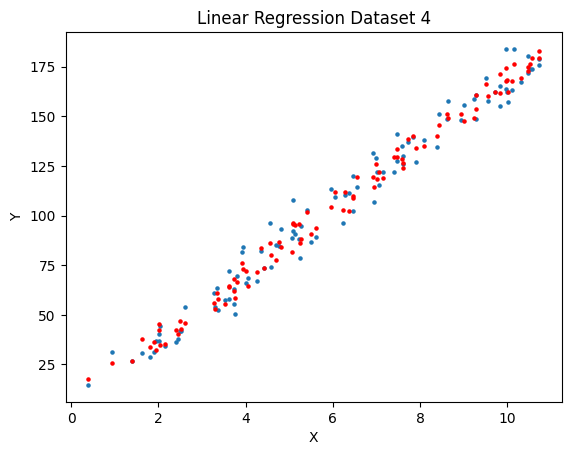

In [62]:
x = list(df["x3"])
y = list(df["y"])
y1 = list(df["predicted_values"])


plt.scatter(x, y,s=5)
plt.scatter(x, y1, color='red',s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Dataset 4")

Verification THrough Scikit-Learn

In [63]:

# Prepare the input and output data
input_columns = ['x0', 'x1','x2','x3']
X = df[input_columns].values
y = df['y'].values

# Train a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict using scikit-learn model
y_pred_sklearn = model_sklearn.predict(X)

# Calculate evaluation metrics using scikit-learn model
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print evaluation metrics for scikit-learn model
print("Scikit-learn Model:")
print("Mean Squared Error:", mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)
print("R-squared:", r2_sklearn)


Scikit-learn Model:
Mean Squared Error: 34.62048082924356
Mean Absolute Error: 5.1555056303787445
Root Mean Squared Error: 5.883917133104745
R-squared: 0.9841749058943147


Gradient Descent (Dataset 4)

In [65]:
def gradient_descent(X1, X2, X3, Y, learning_rate, epoch):

    n = len(Y) #total number of datasets.
    c = 0 #initialising with 0.
    m1 = 0
    m2 = 0
    m3 = 0

    for _ in range(epoch):

        sum = 0
        for i in range(n):
            q = c + m1*X1[i] +  m2*X2[i] +  m3*X3[i] - Y[i]
            sum = sum + q
        c_new = c - learning_rate * ((2/n) * sum)
        c = c_new

        sum = 0
        for i in range(n):
            q = c*X1[i] + m1*X1[i]*X1[i] + m2*X2[i]*X1[i] + m3*X3[i]*X1[i] - Y[i]*X1[i]
            sum = sum + q
        m1_new = m1 - learning_rate * ((2/n) * sum)
        m1 = m1_new

        sum = 0
        for i in range(n):
            q = c*X2[i] + m1*X1[i]*X2[i] + m2*X2[i]*X2[i] + m3*X3[i]*X2[i] - Y[i]*X2[i]
            sum = sum + q
        m2_new = m2 - learning_rate * ((2/n) * sum)
        m2 = m2_new

        sum = 0
        for i in range(n):
            q = c*X3[i] + m1*X1[i]*X3[i] + m2*X2[i]*X3[i] + m3*X3[i]*X3[i] - Y[i]*X3[i]
            sum = sum + q
        m3_new = m3 - learning_rate * ((2/n) * sum)
        m3 = m3_new

    return (m1, m2, m3, c)
X1 = df["x1"]
X2 = df["x2"]
X3 = df["x3"]
Y = df["y"]
result = gradient_descent(X1, X2, X3, Y, 0.01, 5000)
print(result)

# 6.13243763, 2.39226554, 7.74681038, 13.239477824445359

(6.060680905255514, 2.445134785871812, 7.766764500756425, 13.18578203958556)
